In [2]:
import pandas as pd  # Manipulation des données
import numpy as np   # Calculs mathématiques
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisation avancée

# Afficher les graphiques directement dans le notebook
%matplotlib inline

In [2]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv", encoding='latin-1')
df_copy = df.copy()
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [5]:
summary = (
    df.groupby('Department')['Performance_Score']
      .agg(
          Moyenne='mean',
          Écart_type='std',
          Minimum='min',
          Maximum='max',
          Effectif='count'
      )
      .round(2)
      .sort_values('Moyenne', ascending=False)
)

summary


,Moyenne,Écart_type,Minimum,Maximum,Effectif
Department,,,,,
Engineering,3.02,1.42,1,5,10956
Operations,3.01,1.41,1,5,11181
Customer Support,3.00,1.41,1,5,11116
IT,3.00,1.42,1,5,11131
HR,3.00,1.41,1,5,10960
Sales,2.99,1.41,1,5,11122
Finance,2.98,1.41,1,5,11200
Marketing,2.98,1.41,1,5,11216
Legal,2.98,1.42,1,5,11118


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


variables = [
    'Work_Hours_Per_Week',
    'Overtime_Hours',
    'Projects_Handled',
    'Performance_Score',
    'Remote_Work_Frequency',
    'Team_Size',
    'Monthly_Salary'
]

results = []

for var in variables:
    model = ols(f'{var} ~ C(Department)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'].iloc[0]
    results.append({'Variable': var, 'p-value': p_value})

anova_results = pd.DataFrame(results).sort_values(by='p-value')
anova_results

,Variable,p-value
2,Projects_Handled,0.0864
1,Overtime_Hours,0.1370
6,Monthly_Salary,0.4500
3,Performance_Score,0.4673
5,Team_Size,0.5552
4,Remote_Work_Frequency,0.6141
0,Work_Hours_Per_Week,0.8018


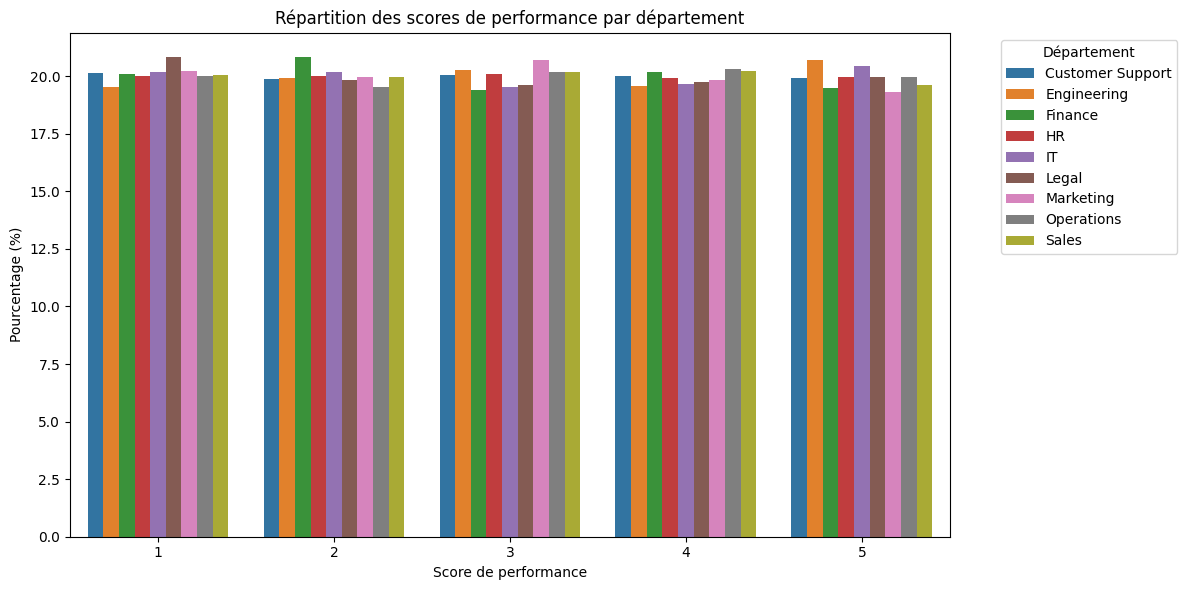

In [5]:
grouped = df.groupby(['Department', 'Performance_Score']).size().reset_index(name='Count')
total_by_dep = df.groupby('Department').size().reset_index(name='Total')
grouped = grouped.merge(total_by_dep, on='Department')
grouped['Percentage'] = grouped['Count'] / grouped['Total'] * 100


plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='Performance_Score',
    y='Percentage',
    hue='Department'
)
plt.title("Répartition des scores de performance par département")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Score de performance")
plt.legend(title="Département", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [6]:
# Créer un dictionnaire de correspondance pour Education_Level
education_mapping = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

# Créer un dictionnaire de correspondance pour Department
department_mapping = { 
    'Customer Support': 1,
    'Engineering': 2,
    'Finance': 3,
    'HR': 4,
    'IT': 5,
    'Legal': 6,
    'Marketing': 7,
    'Operations': 8,
    'Sales': 9
}

# Créer un dictionnaire de correspondance pour Job_Title
job_title_mapping = {
    'Analyst': 1,
    'Consultant': 2,
    'Developer': 3,
    'Engineer': 4,
    'Manager': 5,
    'Specialist': 6,
    'Technician': 7
}

# Appliquer ce mappage pour créer une nouvelle colonne 'Department_ID'
#df['Department_ID'] = df['Department'].map(department_mapping)

# Appliquer ce mappage pour créer une nouvelle colonne 'Education_Level_ID'
#df['Education_Level_ID'] = df['Education_Level'].map(education_mapping)




df.head()


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


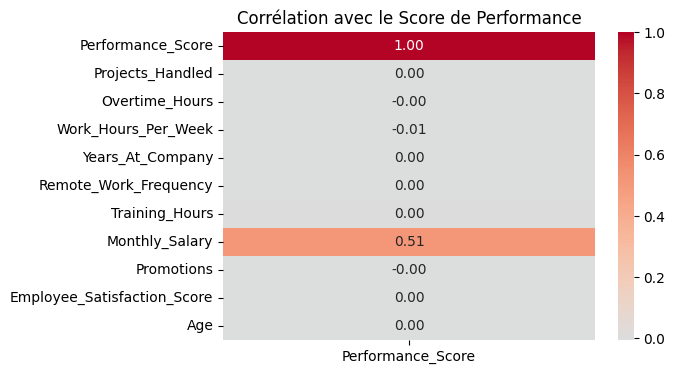

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables quantitatives à tester
variables_corr = [
    'Performance_Score',
    'Projects_Handled',
    'Overtime_Hours',
    'Work_Hours_Per_Week',
    'Years_At_Company',
    'Remote_Work_Frequency',
    'Training_Hours',
    'Monthly_Salary',
    'Promotions',
    'Employee_Satisfaction_Score',
    'Age'
]

# On garde uniquement les colonnes utiles
df_corr = df[variables_corr].dropna()

# Calcul de la corrélation du Performance_Score avec les autres variables
correlation_with_performance = df_corr.corr(method='pearson')['Performance_Score']

# Affichage sous forme de tableau
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_with_performance.to_frame(), annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Corrélation avec le Score de Performance')
plt.show()


In [18]:
import pandas as pd
import statsmodels.api as sm

# Supposons que ton DataFrame s'appelle df

# Liste des variables explicatives possibles (hors 'Performance_Score')
variables_possibles = [
    'Monthly_Salary',
    'Work_Hours_Per_Week',
    'Projects_Handled',
    'Overtime_Hours',
    'Sick_Days',
    'Remote_Work_Frequency',
    'Team_Size',
    'Training_Hours',
    'Promotions',
    'Employee_Satisfaction_Score',
    'Years_At_Company',
    'Age'
]

# On retire les lignes avec des NaN dans les variables utilisées
df_clean = df.dropna(subset=variables_possibles + ['Performance_Score'])

# Variables explicatives (X) et cible (y)
X = df_clean[variables_possibles]
y = df_clean['Performance_Score']

# Ajout de la constante pour l'interception (nécessaire pour statsmodels)
X = sm.add_constant(X)

# Régression linéaire multiple
model = sm.OLS(y, X).fit()

# Résumé des résultats
summary = model.summary2().tables[1]

# Suppression de la ligne "const" (constante)
summary = summary[summary.index != 'const']

# Renommer la colonne des p-values pour la rendre plus explicite
summary.rename(columns={'P>|t|': 'p-value'}, inplace=True)

# Arrondir les p-values à 4 décimales
summary['p-value'] = summary['p-value']

# Mise en valeur des p-values inférieures à 0.05
def color_pvalue(val):
    if val < 0.05:
        return 'background-color: yellow'  # ou une autre couleur de ton choix
    return ''

# Appliquer le formatage conditionnel à la table
styled_summary = summary.style.applymap(color_pvalue, subset=['p-value'])

# Affichage du tableau formaté
styled_summary


C:\Users\sylva\AppData\Local\Temp\ipykernel_2680\1634415302.py:54: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_summary = summary.style.applymap(color_pvalue, subset=['p-value'])


,Coef.,Std.Err.,t,p-value,[0.025,0.975]
Monthly_Salary,0.000526,0.000003,187.507039,0.000000,0.000520,0.000531
Work_Hours_Per_Week,-0.000699,0.000430,-1.624142,0.104349,-0.001542,0.000145
Projects_Handled,0.000157,0.000266,0.591203,0.554386,-0.000364,0.000679
Overtime_Hours,0.000041,0.000444,0.091875,0.926797,-0.000830,0.000911
Sick_Days,0.000378,0.000888,0.425024,0.670820,-0.001364,0.002119
Remote_Work_Frequency,0.000077,0.000109,0.711313,0.476892,-0.000136,0.000291
Team_Size,-0.001726,0.000700,-2.465099,0.013699,-0.003099,-0.000354
Training_Hours,0.000143,0.000133,1.073611,0.283000,-0.000118,0.000404
Promotions,-0.004326,0.004717,-0.917086,0.359100,-0.013570,0.004919
Employee_Satisfaction_Score,0.001423,0.003344,0.425529,0.670452,-0.005132,0.007978


In [26]:
import statsmodels.api as sm

results = {}

# Collecte des résultats pour chaque département
for dept in df['Department'].unique():
    subset = df[df['Department'] == dept]
    X = subset[['Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score', 'Years_At_Company', 'Age']]
    y = subset["Performance_Score"]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results[dept] = model

# Affichage des résultats sous forme de liste formatée
output = []

# Itérer à travers les résultats pour créer une liste lisible
for dept, model in results.items():
    r_squared = model.rsquared
    pvalues = model.pvalues
    sig_vars = pvalues[pvalues < 0.05].index.tolist()
    sig_vars = [var for var in sig_vars if var != 'const']  # on enlève l'intercept

    # Formater chaque ligne pour aligner les valeurs
    output.append(f"{dept:<17} → R² : {r_squared:.3f} | Variables significatives : {', '.join(sig_vars) if sig_vars else 'Aucune'}")

# Afficher la liste des résultats avec alignement
for line in output:
    print(line)


IT                → R² : 0.267 | Variables significatives : Monthly_Salary, Years_At_Company
Finance           → R² : 0.256 | Variables significatives : Monthly_Salary, Team_Size
Customer Support  → R² : 0.268 | Variables significatives : Monthly_Salary, Sick_Days
Engineering       → R² : 0.256 | Variables significatives : Monthly_Salary
Marketing         → R² : 0.256 | Variables significatives : Monthly_Salary
HR                → R² : 0.257 | Variables significatives : Monthly_Salary
Operations        → R² : 0.259 | Variables significatives : Monthly_Salary
Sales             → R² : 0.261 | Variables significatives : Monthly_Salary
Legal             → R² : 0.267 | Variables significatives : Monthly_Salary, Sick_Days


In [10]:
quant_vars = ['Performance_Score', 'Projects_Handled', 'Overtime_Hours', 'Work_Hours_Per_Week', 'Years_At_Company', 'Remote_Work_Frequency', 'Training_Hours', 'Monthly_Salary', 'Promotions', 'Employee_Satisfaction_Score', 'Age']

# Calcul de la moyenne et de la variance
tableau_comparatif = df.groupby('Department')[quant_vars].agg(['mean', 'var']).round(2)

# Affichage
print(tableau_comparatif)


                 Performance_Score       Projects_Handled          \
                              mean   var             mean     var   
Department                                                          
Customer Support              3.00  2.00            24.43  209.62   
Engineering                   3.02  2.00            24.42  207.74   
Finance                       2.98  1.99            24.41  209.22   
HR                            3.00  2.00            24.20  208.81   
IT                            3.00  2.02            24.54  212.48   
Legal                         2.98  2.03            24.21  207.36   
Marketing                     2.98  1.98            24.66  210.69   
Operations                    3.01  2.00            24.30  207.72   
Sales                         2.99  1.99            24.71  210.53   

                 Overtime_Hours        Work_Hours_Per_Week         \
                           mean    var                mean    var   
Department                       

In [11]:
# Calcul des fréquences et des pourcentages pour chaque variable qualitative
for col in ['Job_Title', 'Gender', 'Education_Level', 'Resigned']:
    print(f"Fréquences pour {col}:")
    print(df[col].value_counts())
    print(f"Pourcentages pour {col}:")
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 50)


Fréquences pour Job_Title:
Job_Title
Specialist    14507
Manager       14325
Technician    14285
Analyst       14261
Engineer      14217
Consultant    14210
Developer     14195
Name: count, dtype: int64
Pourcentages pour Job_Title:
Job_Title
Specialist    14.507
Manager       14.325
Technician    14.285
Analyst       14.261
Engineer      14.217
Consultant    14.210
Developer     14.195
Name: proportion, dtype: float64
--------------------------------------------------
Fréquences pour Gender:
Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64
Pourcentages pour Gender:
Gender
Male      48.031
Female    48.001
Other      3.968
Name: proportion, dtype: float64
--------------------------------------------------
Fréquences pour Education_Level:
Education_Level
Bachelor       50041
High School    30004
Master         14904
PhD             5051
Name: count, dtype: int64
Pourcentages pour Education_Level:
Education_Level
Bachelor       50.041
High School    30.004


In [12]:
# Fréquences par département pour 'gender'
print("Distribution du 'gender' par département:")
print(pd.crosstab(df['Department'], df['Gender'], margins=True))


Distribution du 'gender' par département:
Gender            Female   Male  Other     All
Department                                    
Customer Support    5240   5486    390   11116
Engineering         5229   5293    434   10956
Finance             5381   5349    470   11200
HR                  5260   5221    479   10960
IT                  5315   5366    450   11131
Legal               5401   5292    425   11118
Marketing           5397   5383    436   11216
Operations          5398   5339    444   11181
Sales               5380   5302    440   11122
All                48001  48031   3968  100000


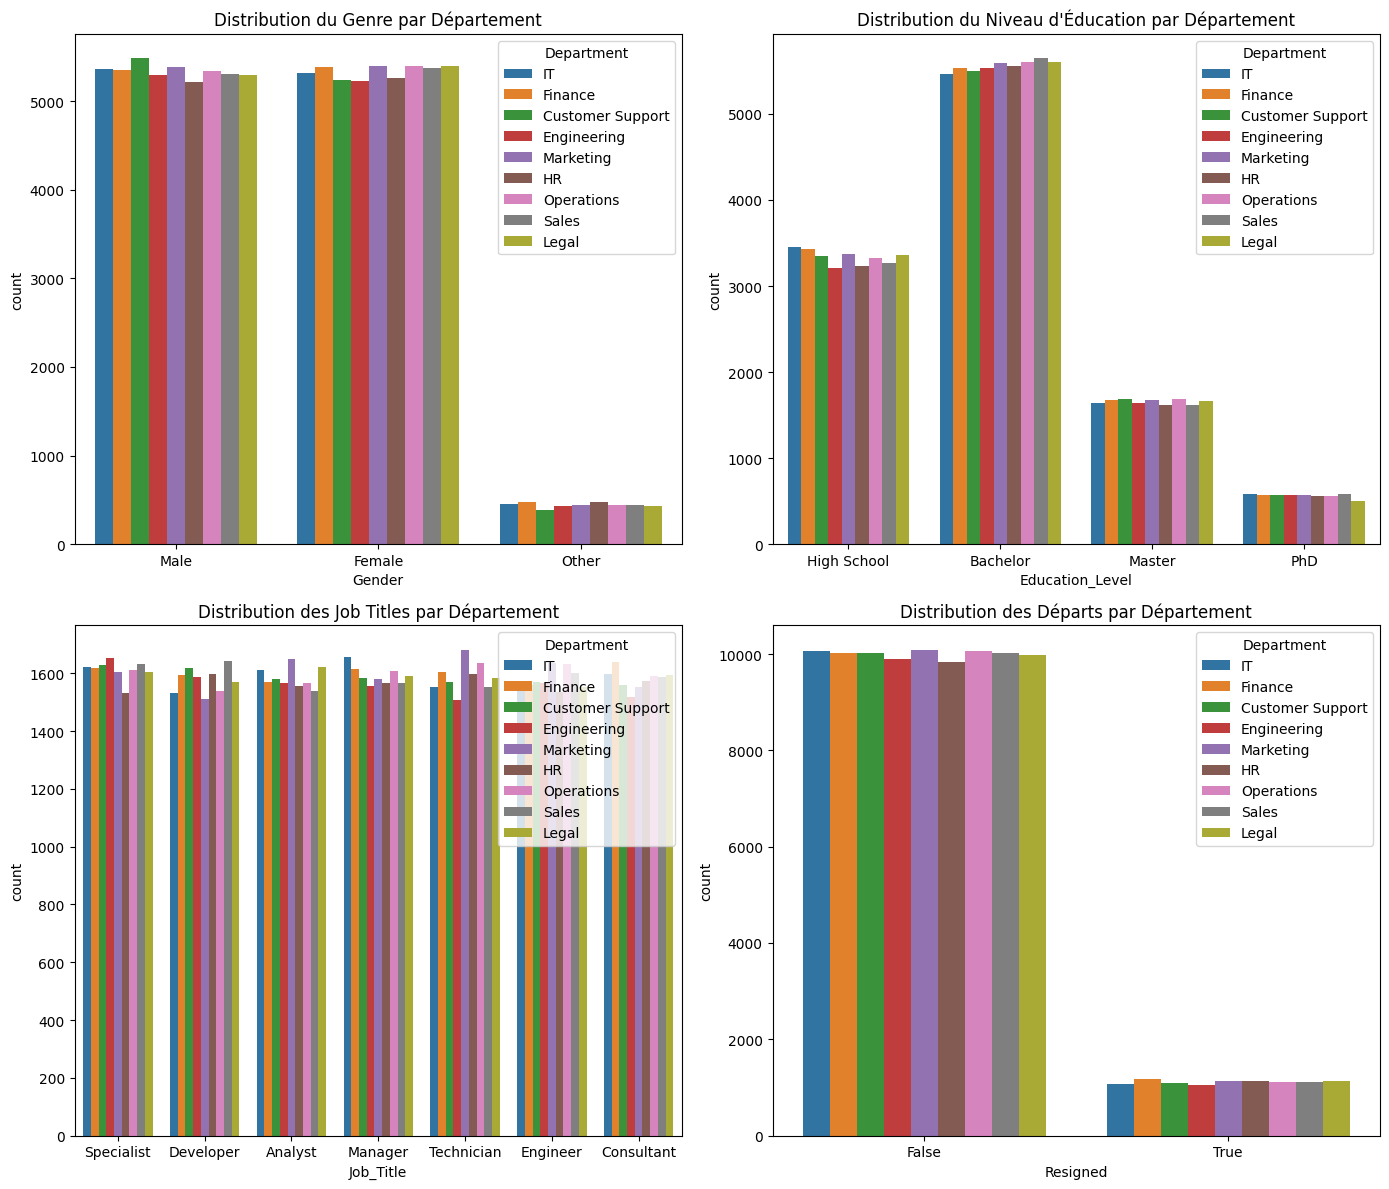

In [13]:
# Graphiques à barres pour chaque variable par département
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gender par département
sns.countplot(data=df, x='Gender', hue='Department', ax=axes[0, 0])
axes[0, 0].set_title('Distribution du Genre par Département')

# Education Level par département
sns.countplot(data=df, x='Education_Level', hue='Department', ax=axes[0, 1])
axes[0, 1].set_title('Distribution du Niveau d\'Éducation par Département')

# Job Title par département
sns.countplot(data=df, x='Job_Title', hue='Department', ax=axes[1, 0])
axes[1, 0].set_title('Distribution des Job Titles par Département')

# Resigned par département
sns.countplot(data=df, x='Resigned', hue='Department', ax=axes[1, 1])
axes[1, 1].set_title('Distribution des Départs par Département')

plt.tight_layout()
plt.show()


In [29]:
from scipy.stats import chi2_contingency
import pandas as pd

variables = ['Job_Title', 'Gender', 'Education_Level', 'Resigned', 'Department']

# Test Chi² entre chaque variable et 'Performance_Score'
for var in variables:
    contingency_table = pd.crosstab(df[var], df['Performance_Score'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Affichage direct avec une mise en forme propre
    print(f"Test Chi-carré entre '{var}' et 'Performance_Score':")
    print(f"Chi²: {chi2:.4f}, p-value: {p:.4f}")
    print("=" * 50)  # Séparateur pour chaque test


Test Chi-carré entre 'Job_Title' et 'Performance_Score':
Chi²: 22.5891, p-value: 0.5441
Test Chi-carré entre 'Gender' et 'Performance_Score':
Chi²: 15.6734, p-value: 0.0473
Test Chi-carré entre 'Education_Level' et 'Performance_Score':
Chi²: 20.0170, p-value: 0.0668
Test Chi-carré entre 'Resigned' et 'Performance_Score':
Chi²: 3.1946, p-value: 0.5258
Test Chi-carré entre 'Department' et 'Performance_Score':
Chi²: 29.8401, p-value: 0.5763


In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

# Variables à tester
variables_qualitatives = ['Job_Title', 'Gender', 'Education_Level', 'Resigned']

# Résultats stockés ici
results = []

# Boucle sur chaque département
for dept in df['Department'].unique():
    df_dept = df[df['Department'] == dept]
    
    for var in variables_qualitatives:
        # Table de contingence
        table = pd.crosstab(df_dept[var], df_dept['Performance_Score'])
        
        # Vérifie que la table est bien formée (au moins 2 lignes et 2 colonnes)
        if table.shape[0] > 1 and table.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(table)
            results.append({
                'Department': dept,
                'Variable': var,
                'Chi2': round(chi2, 4),  # Limitation à 4 décimales
                'p-value': round(p, 4),  # Limitation à 4 décimales
                'Degrees_of_Freedom': dof
            })

# Résultats sous forme de DataFrame
results_df = pd.DataFrame(results)

# Filtrer les résultats pour n'afficher que ceux avec p-value < 0.15
significant_results_df = results_df[results_df['p-value'] < 0.15]

# Trier les résultats par p-value croissante (les plus significatives en premier)
sorted_results_df = significant_results_df.sort_values(by='p-value', ascending=True)

# Appliquer un style pour surligner en jaune les p-values < 0.05
styled_df = sorted_results_df.style.applymap(lambda x: 'background-color: yellow' if isinstance(x, (float, int)) and x < 0.05 else '', subset=['p-value'])

# Masquer les index pour un affichage plus propre
styled_df = styled_df.hide(axis='index')  

# Afficher les résultats triés et stylisés
styled_df


C:\Users\sylva\AppData\Local\Temp\ipykernel_2680\1340624680.py:39: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = sorted_results_df.style.applymap(lambda x: 'background-color: yellow' if isinstance(x, (float, int)) and x < 0.05 else '', subset=['p-value'])


Department,Variable,Chi2,p-value,Degrees_of_Freedom
HR,Resigned,10.561000,0.032000,4
HR,Job_Title,37.966200,0.034900,24
IT,Job_Title,34.237100,0.080500,24
Operations,Gender,12.940300,0.113900,8
Marketing,Gender,12.637400,0.125000,8


In [36]:
resigned_mapping = {False: 0, True: 1}
df['Resigned_ID'] = df['Resigned'].map(resigned_mapping)

df = pd.get_dummies(df, columns=['Gender'], prefix='Gender_')
gender_title_columns = [col for col in df.columns if col.startswith('Gender_')]
df[gender_title_columns] = df[gender_title_columns].astype(int)

df = pd.get_dummies(df, columns=['Job_Title'], prefix='JobTitle')
job_title_columns = [col for col in df.columns if col.startswith('JobTitle')]
df[job_title_columns] = df[job_title_columns].astype(int)

df.head()

,Employee_ID,Department,Age,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,...,Gender__Female,Gender__Male,Gender__Other,JobTitle_Analyst,JobTitle_Consultant,JobTitle_Developer,JobTitle_Engineer,JobTitle_Manager,JobTitle_Specialist,JobTitle_Technician
0,1,IT,55,2022-01-19 08:03:05.556036,2,High School,5,6750.0000,33,32,...,0,1,0,0,0,0,0,0,1,0
1,2,Finance,29,2024-04-18 08:03:05.556036,0,High School,5,7500.0000,34,34,...,0,1,0,0,0,1,0,0,0,0
2,3,Finance,55,2015-10-26 08:03:05.556036,8,High School,3,5850.0000,37,27,...,0,1,0,0,0,0,0,0,1,0
3,4,Customer Support,48,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0000,52,10,...,1,0,0,1,0,0,0,0,0,0
4,5,Engineering,36,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0000,38,11,...,1,0,0,1,0,0,0,0,0,0


In [54]:
import pandas as pd
import statsmodels.api as sm

# Dictionnaire des variables explicatives par département
variables_by_dept = {
    'IT': ['Monthly_Salary', 'Years_At_Company'],
    'Finance': ['Monthly_Salary', 'Team_Size'],
    'Customer Support': ['Monthly_Salary', 'Sick_Days'],
    'Engineering': ['Monthly_Salary'],
    'Marketing': ['Monthly_Salary'],
    'HR': ['Monthly_Salary', 'JobTitle_Analyst', 'JobTitle_Consultant', 'JobTitle_Developer', 'JobTitle_Engineer', 'JobTitle_Manager', 'JobTitle_Specialist', 'JobTitle_Technician', 'Resigned_ID'],
    'Operations': ['Monthly_Salary'],
    'Sales': ['Monthly_Salary'],
    'Legal': ['Monthly_Salary', 'Sick_Days']
}

# Dictionnaire pour stocker les R² par variable et par département
r_squared_by_variable = {}

for dept, variables in variables_by_dept.items():
    df_dept = df[df['Department'] == dept].dropna(subset=variables + ['Performance_Score'])
    r_squared_by_variable[dept] = {}

    for var in variables:
        X = df_dept[[var]]
        X = pd.get_dummies(X, drop_first=True)  # encodage si variable catégorielle
        X = sm.add_constant(X)
        y = df_dept['Performance_Score']
        
        model = sm.OLS(y, X).fit()
        r_squared_by_variable[dept][var] = round(model.rsquared, 3)  # R² arrondi à 3 décimales

# Affichage amélioré
output = []

for dept, vars_r2 in r_squared_by_variable.items():
    dept_output = [f"Département: {dept}"]
    for var, r2 in vars_r2.items():
        dept_output.append(f"  {var}: R² = {r2}")
    output.append("\n".join(dept_output))

# Affichage avec un joli format
print("\n\n".join(output))

Département: IT
  Monthly_Salary: R² = 0.266
  Years_At_Company: R² = 0.0

Département: Finance
  Monthly_Salary: R² = 0.255
  Team_Size: R² = 0.0

Département: Customer Support
  Monthly_Salary: R² = 0.267
  Sick_Days: R² = 0.0

Département: Engineering
  Monthly_Salary: R² = 0.256

Département: Marketing
  Monthly_Salary: R² = 0.255

Département: HR
  Monthly_Salary: R² = 0.256
  JobTitle_Analyst: R² = 0.0
  JobTitle_Consultant: R² = 0.001
  JobTitle_Developer: R² = 0.0
  JobTitle_Engineer: R² = 0.0
  JobTitle_Manager: R² = 0.0
  JobTitle_Specialist: R² = 0.0
  JobTitle_Technician: R² = 0.0
  Resigned_ID: R² = 0.0

Département: Operations
  Monthly_Salary: R² = 0.259

Département: Sales
  Monthly_Salary: R² = 0.26

Département: Legal
  Monthly_Salary: R² = 0.266
  Sick_Days: R² = 0.0


In [21]:
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

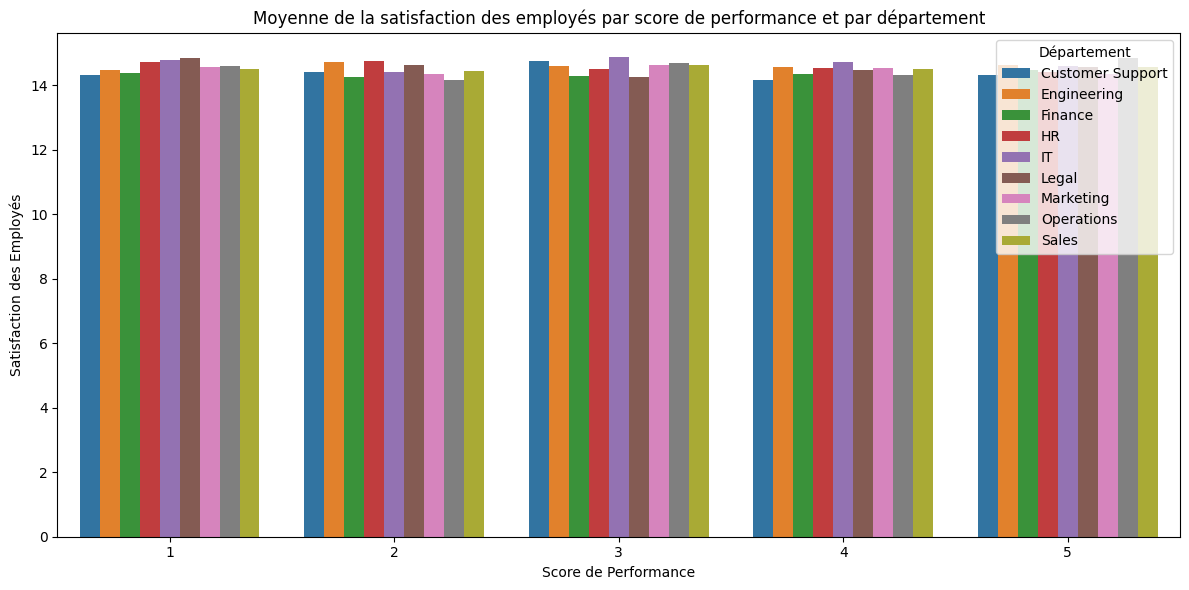

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que df soit votre DataFrame avec les colonnes : 'Department', 'Performance_Score', 'Employee_Satisfaction'

# Calcul de la moyenne de la satisfaction des employés par département et score de performance
avg_satisfaction = df.groupby(['Department', 'Performance_Score'])['Overtime_Hours'].mean().reset_index()

# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_satisfaction, x='Performance_Score', y='Overtime_Hours', hue='Department')

# Personnalisation du graphique
plt.title('Moyenne de la satisfaction des employés par score de performance et par département')
plt.xlabel('Score de Performance')
plt.ylabel('Satisfaction des Employés')
plt.legend(title='Département')

# Affichage du graphique
plt.tight_layout()
plt.show()


In [55]:
import numpy as np
import scipy.stats as stats

# Effectuer le test de Shapiro-Wilk
statistic, p_value = stats.shapiro(df['Performance_Score'])

# Résultats du test de Shapiro-Wilk
result = f"""
Test de Shapiro-Wilk pour la normalité :

- Statistique de test (W) : {statistic:.3f}
- P-value : {p_value:.3f}

Interprétation :
"""

# Interprétation du résultat
if p_value < 0.05:
    result += "Les données ne suivent pas une distribution normale (H0 rejetée)."
else:
    result += "Les données suivent une distribution normale (H0 non rejetée)."

# Afficher les résultats
print(result)



Test de Shapiro-Wilk pour la normalité :

- Statistique de test (W) : 0.888
- P-value : 0.000

Interprétation :
Les données ne suivent pas une distribution normale (H0 rejetée).


C:\Users\sylva\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [87]:
import pandas as pd

# Convertir la colonne 'higherDate' en type date
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')


# Créer un DataFrame alternatif avec les personnes recrutées depuis le 01/01/2020
df_filtered = df[df['Hire_Date'] >= '2020-01-01']

# Vérifier les premières lignes pour être sûr
df_filtered.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
6,7,IT,Male,37,Technician,2023-08-28 08:03:05.556036,1,Bachelor,5,5250.0,55,20,29,2,0,16,27,0,4.46,False
8,9,Marketing,Female,55,Technician,2023-06-29 08:03:05.556036,1,High School,2,4200.0,51,23,21,14,0,1,0,1,1.44,False


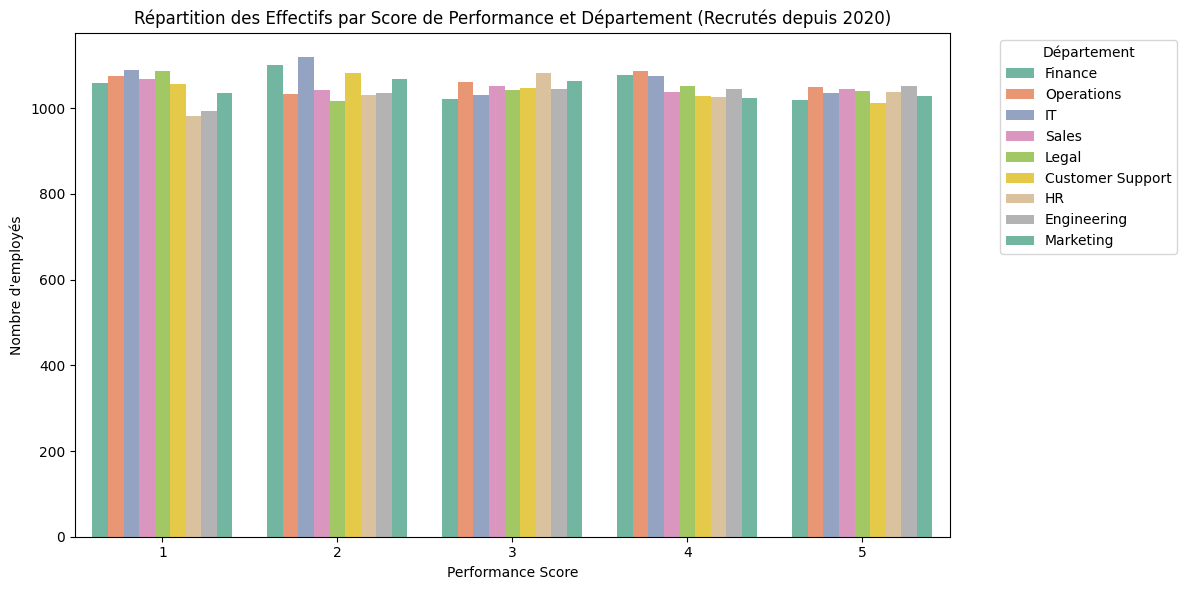

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique de la répartition des effectifs par score de performance, pour chaque département
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='Performance_Score', hue='Department', palette='Set2')

# Ajouter des labels et un titre
plt.title('Répartition des Effectifs par Score de Performance et Département (Recrutés depuis 2020)')
plt.xlabel('Performance Score')
plt.ylabel('Nombre d\'employés')
plt.legend(title='Département', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

# Exemple de DataFrame de données
# df = pd.read_csv('data.csv')  # Charger tes vraies données

# Liste des départements
departments = ['IT', 'Finance', 'HR', 'Engineering', 'Marketing', 'Operations', 'Sales', 'Legal']

# Créer un tableau de résultat vide
result = pd.DataFrame(columns=['Variable', 'Global'] + departments)

# Calculer la corrélation avec le salaire pour chaque variable globalement
corr_salaire = df.corr()['Monthly_Salary']

# Ajouter la corrélation globale pour chaque variable
result['Global'] = corr_salaire

# Pour chaque département, on effectue un groupby et on calcule les corrélations spécifiques
for dept in departments:
    # Effectuer un groupby sur le département
    dept_group = df[df['Department'] == dept]
    dept_corr = dept_group.corr()['Monthly_Salary']  # Corrélation pour chaque variable dans ce département
    
    # Ajouter les résultats de corrélation pour ce département dans le tableau
    for variable in dept_corr.index:
        result.loc[result['Variable'] == variable, dept] = dept_corr[variable]

# Affichage du tableau des corrélations
print(result)


ValueError: could not convert string to float: 'IT'

In [71]:
# Retirer 'Monthly_Salary' de la liste des variables à analyser
variables_corr = [
    'Performance_Score',
    'Projects_Handled',
    'Overtime_Hours',
    'Work_Hours_Per_Week',
    'Years_At_Company',
    'Remote_Work_Frequency',
    'Training_Hours',
    'Promotions',
    'Employee_Satisfaction_Score',
    'Age'
]

# Calculer la corrélation entre chaque variable et les départements
corr_by_department = df.groupby('Department')[variables_corr].apply(lambda x: x.corrwith(df['Monthly_Salary']))

# Transposer pour avoir les départements en colonnes et les variables en lignes
corr_matrix = corr_by_department.T

# Appliquer un style pour surligner en vert la meilleure corrélation dans chaque département
def highlight_corr(s):
    styles = []
    for v in s:
        if v == s.max():
            styles.append('background-color: green')  # Meilleure corrélation en vert
        elif val >= 0.1:
            return 'background-color: orange'  # Corrélation >= 0.1 en orange
        else:
            styles.append('')
    return styles
# Appliquer le style à la matrice de corrélation
styled_corr_matrix = corr_matrix.style.apply(highlight_max, axis=0)

# Affichage du tableau stylisé
styled_corr_matrix


Department,Customer Support,Engineering,Finance,HR,IT,Legal,Marketing,Operations,Sales
Performance_Score,0.516683,0.505659,0.505038,0.506381,0.516064,0.515997,0.505427,0.508602,0.510131
Projects_Handled,0.007836,0.001688,-0.015103,0.002047,-0.021588,0.001744,0.013260,0.000200,-0.007309
Overtime_Hours,0.002146,-0.002848,-0.011801,0.003620,-0.005388,-0.007546,0.008847,-0.003907,-0.010735
Work_Hours_Per_Week,0.003366,-0.012524,-0.001103,0.013195,0.005146,-0.003069,-0.005576,-0.019843,-0.001006
Years_At_Company,0.027806,0.002532,-0.008983,-0.010319,-0.002261,-0.017724,-0.005261,0.002526,0.006285
Remote_Work_Frequency,0.007059,0.001577,-0.010381,-0.012124,0.007160,-0.021053,-0.009558,0.014756,0.018090
Training_Hours,-0.004394,-0.006033,-0.008346,-0.000852,-0.009689,0.002989,0.009237,0.003580,0.003513
Promotions,0.003585,0.005118,-0.001720,-0.015847,0.000017,-0.007904,-0.001033,0.008811,-0.008682
Employee_Satisfaction_Score,-0.004783,0.000995,-0.001874,0.005710,-0.013915,0.011525,-0.006405,0.016399,0.001769
Age,0.009023,0.008412,0.016367,-0.006548,0.007005,0.004631,0.003130,-0.007647,-0.009411


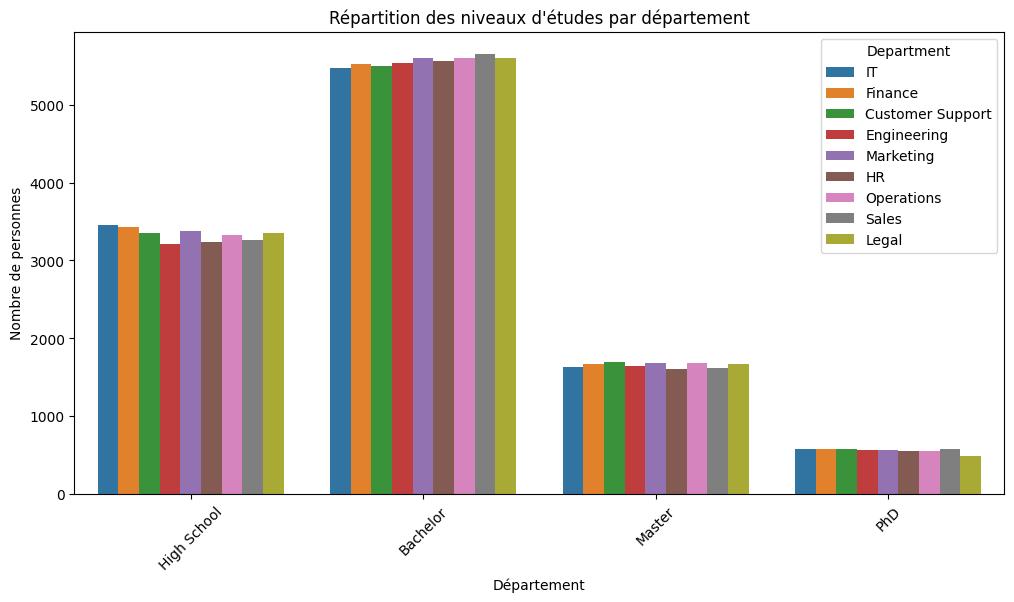

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assumons que la colonne 'Education_Level' contient le niveau d'études et 'Department' le département
plt.figure(figsize=(12, 6))
sns.countplot(x='Education_Level', hue='Department', data=df)
plt.title('Répartition des niveaux d\'études par département')
plt.xlabel('Département')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=45)
plt.show()
